![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [56]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
#Read CSV files and initialize them as dataframes
workout_df = pd.read_csv('data/workout.csv')
key_word_df = pd.read_csv('data/three_keywords.csv')
country_df = pd.read_csv('data/workout_geo.csv')
expanding_df = pd.read_csv('data/three_keywords_geo.csv')

2020


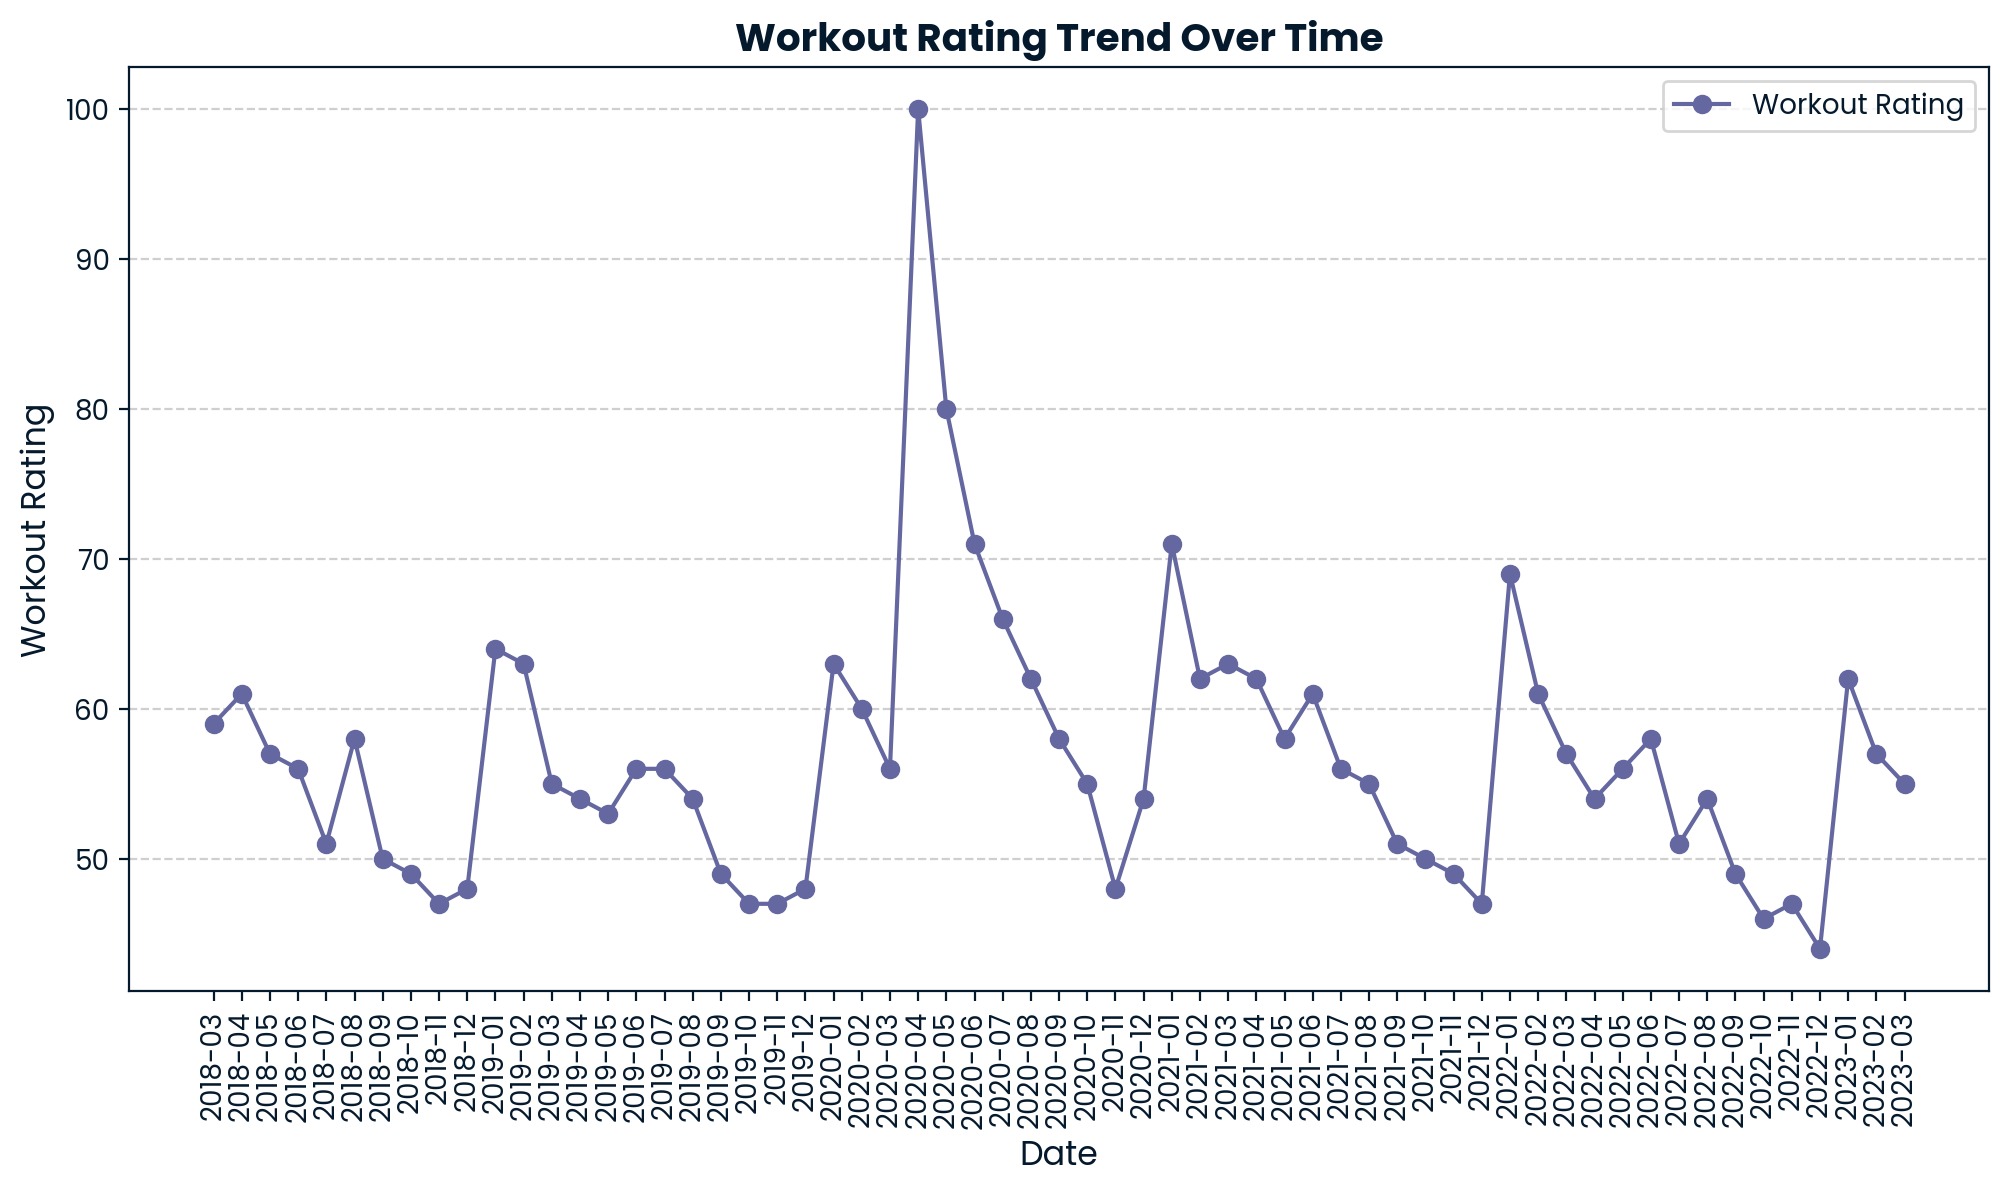

In [58]:
# Initialize variables to track the highest workout rating and corresponding year
max_value = 0.0
year_str = ""

# Iterate over the rows of the dataframe
for index, row in workout_df.iterrows():
    # Check if the current workout rating is higher than max_value
    if row['workout_worldwide'] > max_value:
        # Update max_value and store the corresponding year from the 'month' column
        max_value = row['workout_worldwide']
        year_str = str(row['month'][:4])

# Print the year with the highest workout rating
print(year_str)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(workout_df["month"], workout_df["workout_worldwide"], marker="o", linestyle="-", markersize=6, label="Workout Rating")

plt.xlabel("Date", fontsize=12)
plt.ylabel("Workout Rating", fontsize=12)
plt.title("Workout Rating Trend Over Time", fontsize=14, fontweight="bold")
plt.xticks(rotation=90)
plt.grid(True, linestyle="--", alpha=0.6, axis="y")
plt.legend()
plt.show()

home_workout
gym_workout


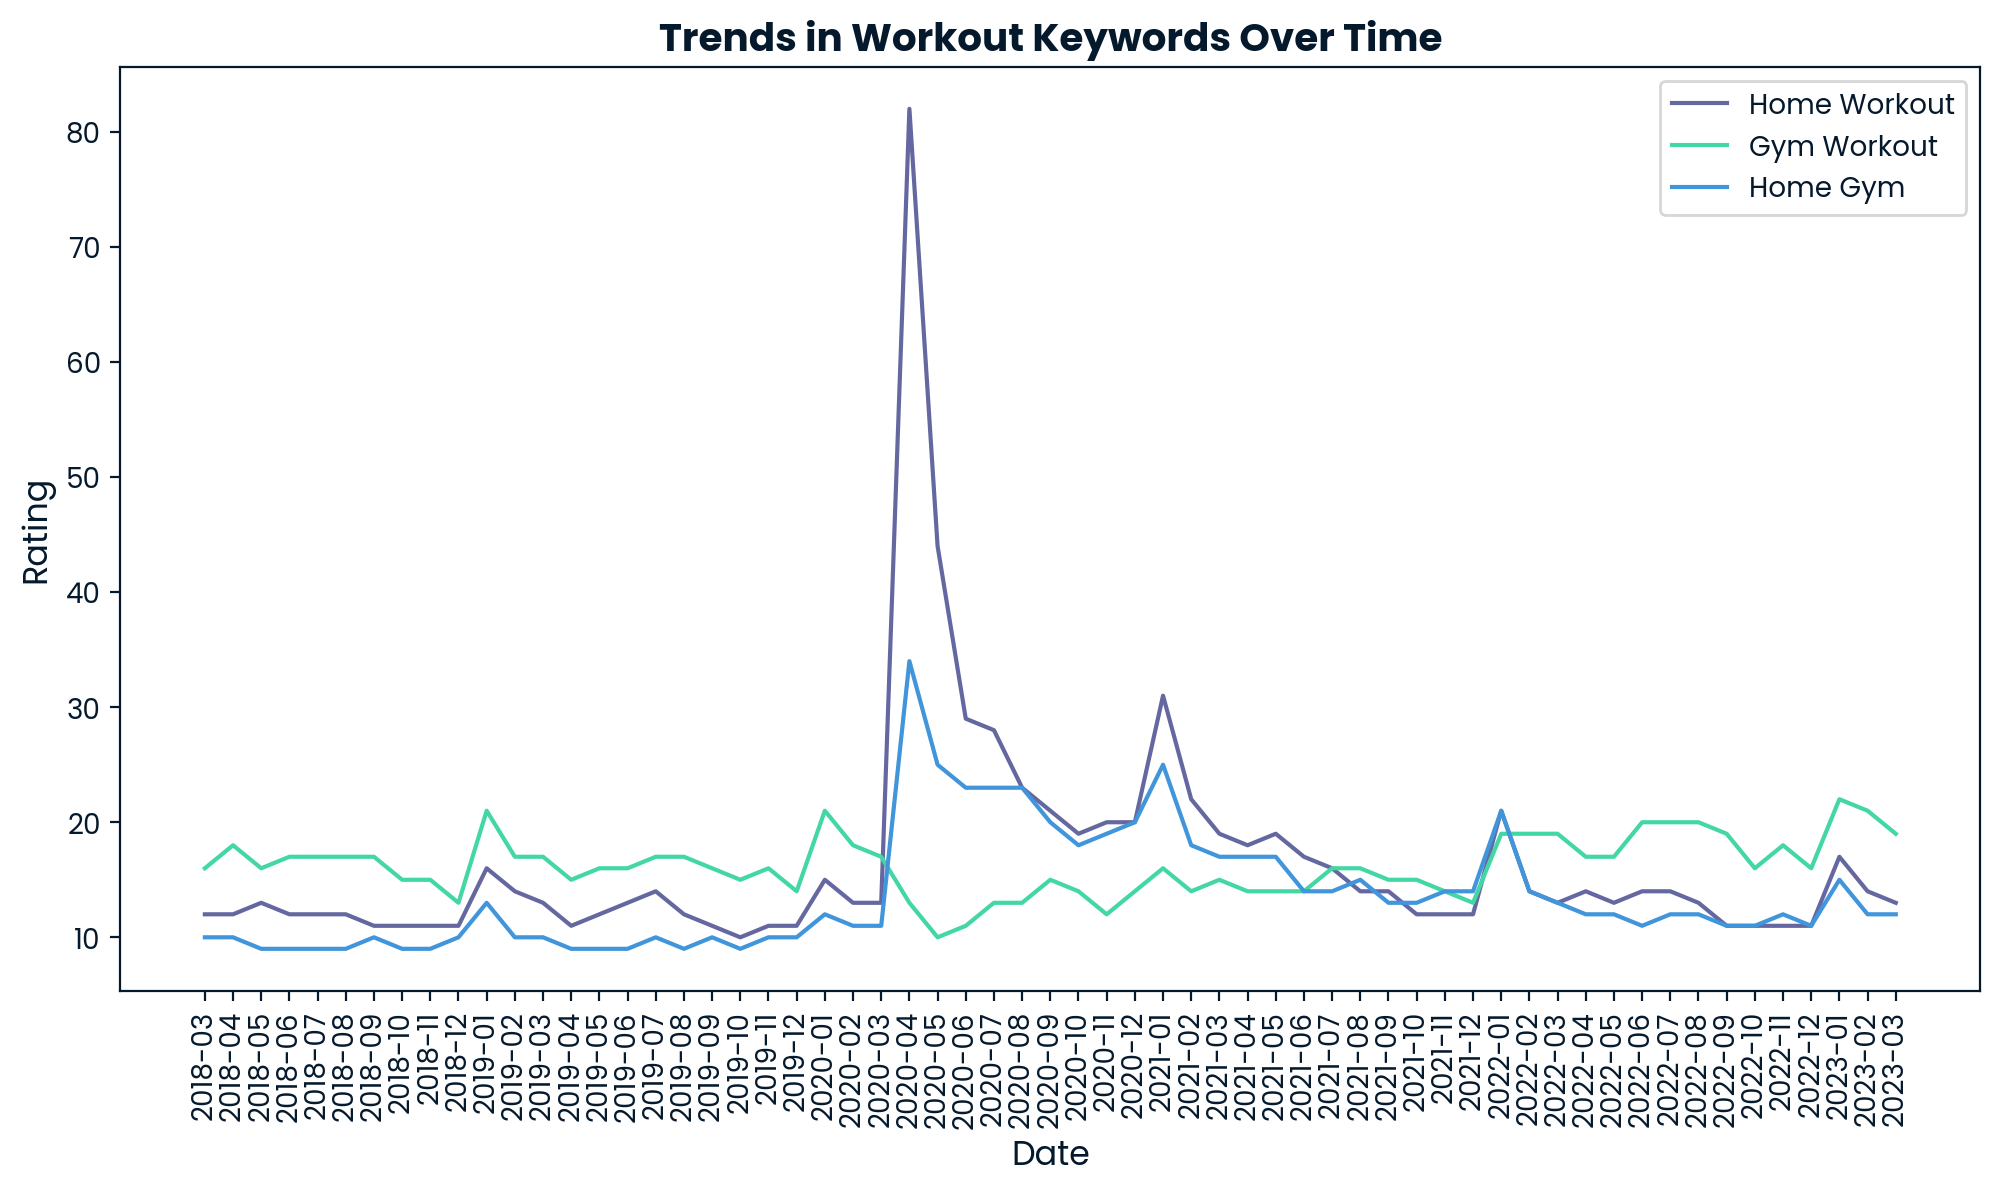

In [59]:
# Initialize variables to track the highest workout trend for 2020 and 2023
peak_covid_value = 0
peak_covid = ""
current_value = 0
current = ""

# Iterate over the rows of the dataframe
for index, row in key_word_df.iterrows():
    # Check if the row corresponds to the year 2020
    if row['month'][:4] == "2020":
        # Find the maximum value among the three workout types
        max_value = max(row['home_workout_worldwide'], row['gym_workout_worldwide'],
                        row['home_gym_worldwide'])
        
        # Update peak_covid_value and peak_covid if a new max is found
        if max_value > peak_covid_value:
            peak_covid_value = max_value
            # Assign the corresponding workout type to peak_covid
            if max_value == row['home_workout_worldwide']:
                peak_covid = 'home_workout'
            elif max_value == row['gym_workout_worldwide']:
                peak_covid = 'gym_workout'
            elif max_value == row['home_gym_worldwide']:
                peak_covid = 'home_gym'
     
    # Check if the row corresponds to the year 2023
    if row['month'][:4] == "2023":
        # Find the maximum value among the three workout types
        max_value2 = max(row['home_workout_worldwide'], row['gym_workout_worldwide'],
                         row['home_gym_worldwide'])
        
        # Update current_value and current if a new max is found
        if max_value2 > current_value:
            current_value = max_value2
            # Assign the corresponding workout type to current
            if max_value2 == row['home_workout_worldwide']:
                current = 'home_workout'
            elif max_value2 == row['gym_workout_worldwide']:
                current = 'gym_workout'
            elif max_value2 == row['home_gym_worldwide']:
                current = 'home_gym'
    
# Print the most popular workout trends for 2020 and 2023
print(peak_covid)
print(current)

#Plot the data
plt.figure(figsize=(12, 6))
plt.plot(key_word_df["month"], key_word_df["home_workout_worldwide"], label="Home Workout")
plt.plot(key_word_df["month"], key_word_df["gym_workout_worldwide"], label="Gym Workout")
plt.plot(key_word_df["month"], key_word_df["home_gym_worldwide"], label="Home Gym")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.title("Trends in Workout Keywords Over Time", fontsize=14, fontweight="bold")
plt.xticks(rotation=90)
plt.legend()
plt.show()


Country with the highest workout interest: United States


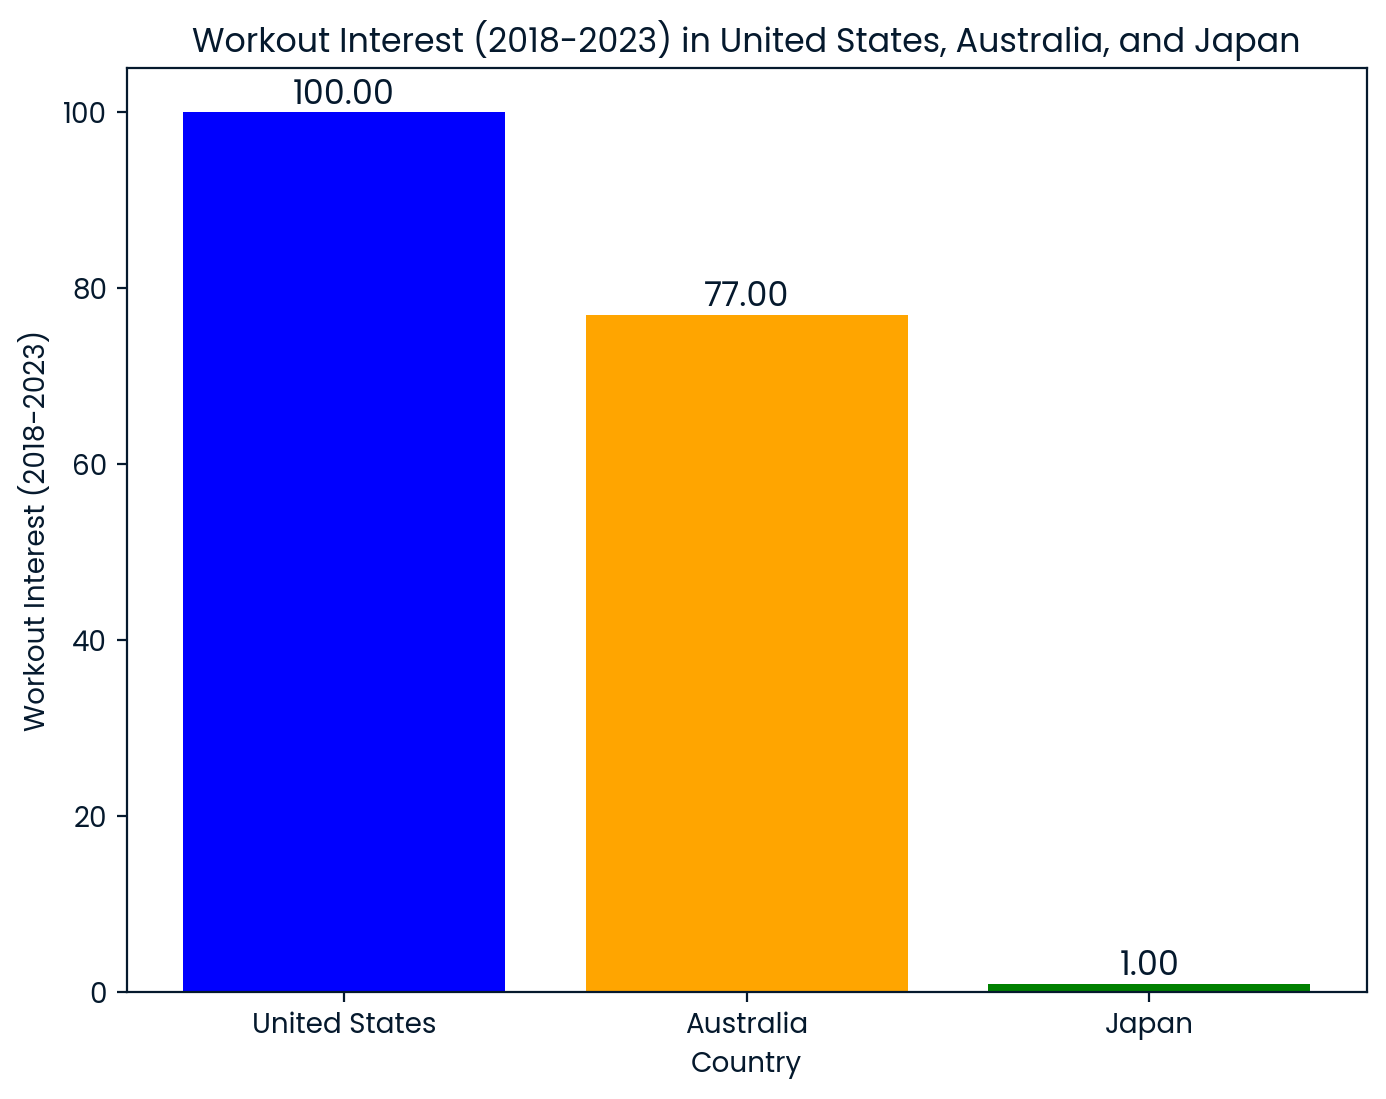

In [60]:
# Initialize variables to track the highest workout rating and corresponding country
max_value3 = 0.0
top_country = ""

# Iterate over the rows of the dataframe
for index, row in country_df.iterrows():
    # Check if the country is the United States, Australia, or Japan
    if row['country'] in ['United States', 'Australia', 'Japan']:
        # Update max_value3 and top_country if the current workout rating is higher
        if row['workout_2018_2023'] > max_value3:
            max_value3 = row['workout_2018_2023']
            top_country = row['country']

# Set 'country' as the index to make it easier to access by country name
country_df.set_index('country', inplace=True)

# List of countries we are interested in
countries = ['United States', 'Australia', 'Japan']

# Extract workout interest for these countries
workout_interest = country_df.loc[countries, 'workout_2018_2023']

# Find the country with the highest workout interest
top_country = workout_interest.idxmax()

# Print the country with the highest interest
print("Country with the highest workout interest:", top_country)

# Plot the data
plt.figure(figsize=(8, 6))
bars = plt.bar(workout_interest.index, workout_interest.values, color=['blue', 'orange', 'green'])
plt.bar_label(bars, fmt='%.2f', fontsize=12)
plt.xlabel('Country')
plt.ylabel('Workout Interest (2018-2023)')
plt.title('Workout Interest (2018-2023) in United States, Australia, and Japan')
plt.show()


Philippines


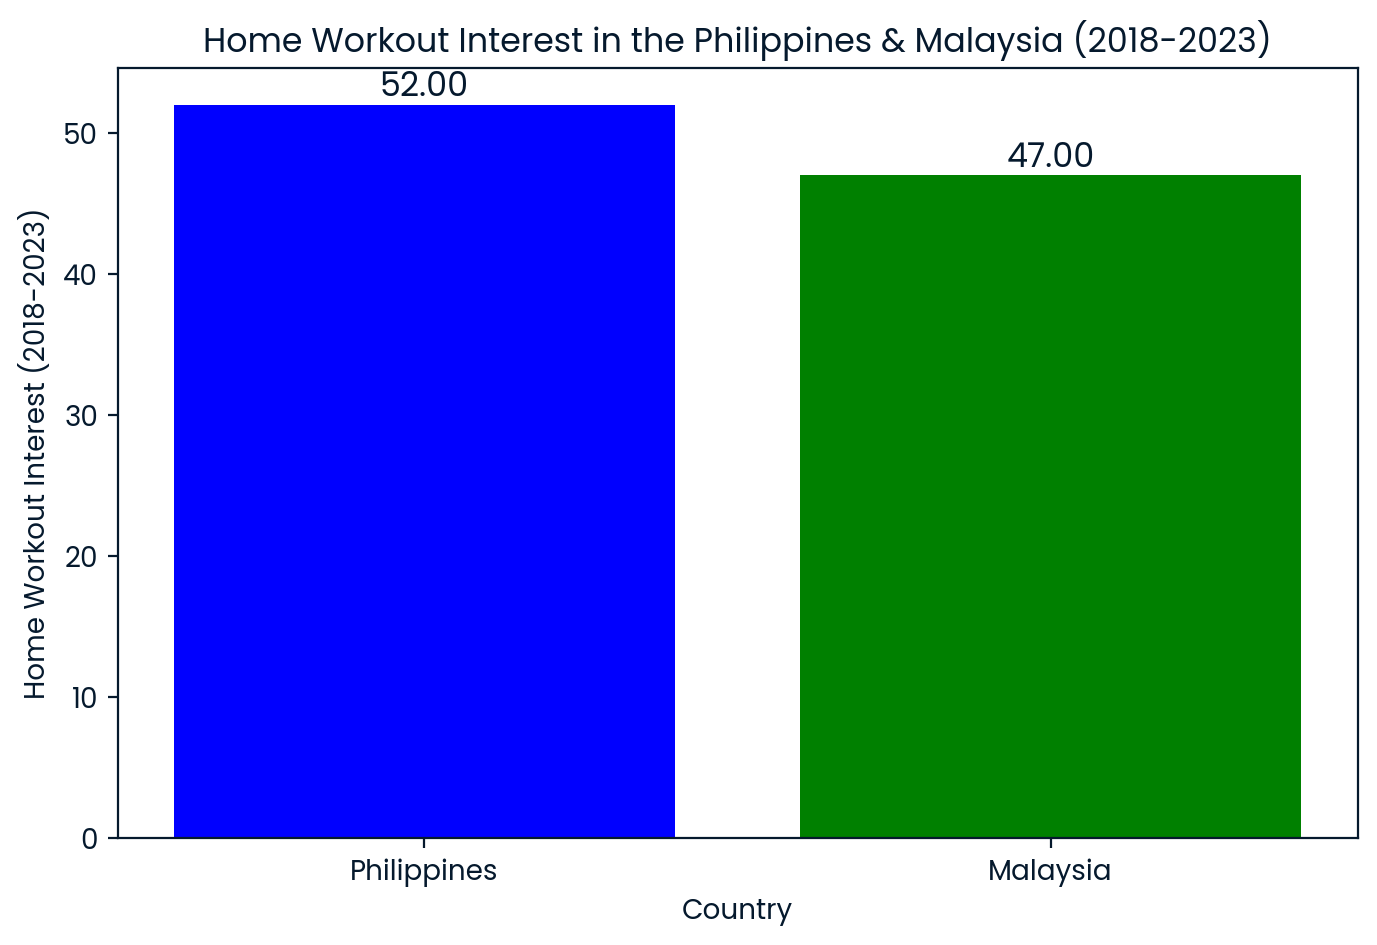

In [61]:
# Initialize variables to track the highest home workout rating and corresponding country
max_value4 = 0.0
home_workout_geo = ""

# Lists to store data for plotting
countries = []
home_workout_values = []

# Iterate over the rows of the dataframe
for index, row in expanding_df.iterrows():
    # Check if the country is either the Philippines or Malaysia
    if row['Country'] in ['Philippines', 'Malaysia']:
        countries.append(row['Country'])
        home_workout_values.append(row['home_workout_2018_2023'])

        # Update max_value4 and home_workout_geo if a higher workout rating is found
        if row['home_workout_2018_2023'] > max_value4:
            max_value4 = row['home_workout_2018_2023']
            home_workout_geo = row['Country']

# Print the country with the highest home workout rating
print(home_workout_geo)

# Plot the data
plt.figure(figsize=(8, 5))
bars = plt.bar(countries, home_workout_values, color=['blue', 'green'])
plt.bar_label(bars, fmt='%.2f', fontsize=12)
plt.xlabel("Country")
plt.ylabel("Home Workout Interest (2018-2023)")
plt.title("Home Workout Interest in the Philippines & Malaysia (2018-2023)")
plt.show()
